#### In this exercise we are going to use Boston Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/Boston.csv"
BostonData = pd.read_csv(url)
del BostonData['Unnamed: 0']
BostonData.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### let's first categorize medv to 4 groups. 
Lowest 20% medv is categorized as Level 1

next 30% medv is categorized as Level 2

next 30% medv is categorized as Level 3

Top 20% medv is categorized as Level 4


In [6]:
BostonData['medvCategory'] = '1'
mask_cat2 = ((BostonData['medv'] > BostonData['medv'].quantile(.2)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.5)))   
mask_cat3 = ((BostonData['medv'] > BostonData['medv'].quantile(.5)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.8)))  
mask_cat4 = (BostonData['medv'] > BostonData['medv'].quantile(.8)) 

BostonData.loc[mask_cat2,'medvCategory'] = '2'
BostonData.loc[mask_cat3,'medvCategory'] = '3'
BostonData.loc[(BostonData['medv'] > BostonData['medv'].quantile(.8)) ,'medvCategory'] = '4'


#### Our goal is to predict medvCategory based on 'rm', 'ptratio' and 'lstat'

#### First standardize your input (X) variables - put standardized values in new variables 'rm_st' , 'ptraio_st' and 'lstat_st'

In [9]:
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

BostonData['rm_st']= Standardize(BostonData['rm'])
BostonData['ptratio_st'] = Standardize(BostonData['ptratio'])
BostonData['lstat_st'] = Standardize(BostonData['lstat'])



#### Run a KNN classifier with 5 nearest neighbors and report your misclassification error. set weights to uniform

In [14]:
from sklearn import neighbors, metrics

X = BostonData[['rm_st','ptratio_st','lstat_st']]
y = BostonData['medvCategory']

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X,y)

Score1 = knn.score(X,y)
print(Score1)


0.786561264822


Is this error reliable? Error is 22%.  No. This is just running against itself, there is no test data

Answer: 

#### Now use 10-fold cross-validation to choose the most efficient K (number of neighbors)

<IPython.core.display.Javascript object>


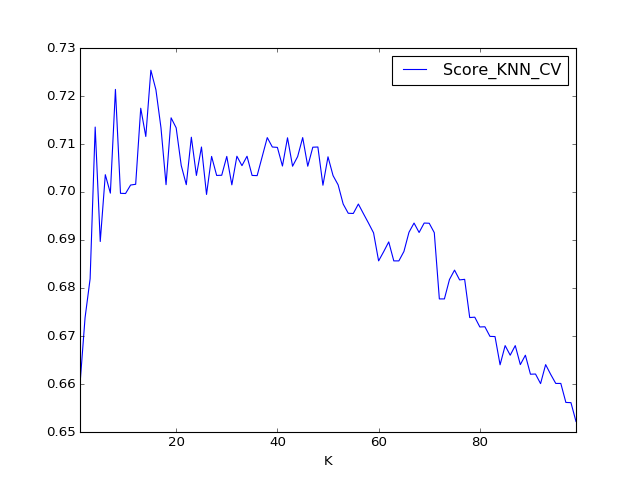

In [15]:
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn import cross_validation

kf = cross_validation.KFold(len(BostonData), n_folds = 10, shuffle = True) #10 fold CV
Score_KNN_CV = []
RangeOfK = range(1,100)
scores = []
for k in RangeOfK:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores = []
    for train_index, test_index in kf:        
        knn.fit(X.iloc[train_index], y.iloc[train_index])
        scores.append(knn.score(X.iloc[test_index],y.iloc[test_index]))
    Score_KNN_CV.append(np.mean(scores))

Score_KNN_CV_df = pd.DataFrame({'Score_KNN_CV': Score_KNN_CV ,'K': RangeOfK })
Score_KNN_CV_df.plot(x = 'K',y = 'Score_KNN_CV')


 Explain your findings:

#### Train your algorithm with the optimal K you found above (don't worry if it changes from time to time - if that is the case use the one that is usually the best). After training your model with that K, Use it to predict the class of a neighborhood with rm =2, lstat = 3.5 and ptratio of 19. 

In [69]:
# We shall standardize our input first!
def Standardize_One(X,v):
    X_Max = X.max()
    X_Min = X.min()
    v = X_Min if X_Min > v else v #????
    v = X_Max if X_Max < v else v #????
    X_Standardized = (v-X_Min)/(X_Max - X_Min)
    return X_Standardized

X = BostonData[['rm_st','ptratio_st','lstat_st']]
y = BostonData['medvCategory']

knn = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn.fit(X,y)

Score1 = knn.score(X,y)
print(Score1)

a=Standardize_One(BostonData['rm'],2)
b=Standardize_One(BostonData['ptratio'],19)
c=Standardize_One(BostonData['lstat'],3.5)
PX=[[a,b,c]]
print a, b, c
print knn.predict(PX)



0.750988142292
0.0 0.68085106383 0.0488410596026
['2']


# Now let's run a KNN-regression model to predict MEDV of the same point

<IPython.core.display.Javascript object>


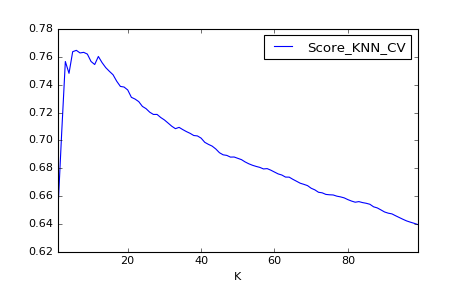

In [62]:
%matplotlib notebook
from sklearn import cross_validation

X = BostonData[['rm','ptratio','lstat']]
y = BostonData['medv']

kf = cross_validation.KFold(len(BostonData), n_folds = 10, shuffle = True) #10 fold CV
Score_KNN_CV = []
RangeOfK = range(1,100)
scores = []
for k in RangeOfK:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights='uniform')
    scores = []
    for train_index, test_index in kf:        
        knn.fit(X.iloc[train_index], y.iloc[train_index])
        scores.append(knn.score(X.iloc[test_index],y.iloc[test_index]))
    Score_KNN_CV.append(np.mean(scores))

Score_KNN_CV_df = pd.DataFrame({'Score_KNN_CV': Score_KNN_CV ,'K': RangeOfK })
Score_KNN_CV_df.plot(x = 'K',y = 'Score_KNN_CV')


In [67]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn.fit(X,y)

Score1 = knn.score(X,y)
print(Score1)

PX=[[2,19,3.5]]

print knn.predict(PX)


0.84809796971
[ 31.18]


In [44]:
print BostonData['medv'].quantile(.2)
print BostonData['medv'].quantile(.5)   

15.3
21.2


In [49]:
BostonData[['rm','ptratio','lstat','medv']].describe()

,rm,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000
mean,6.284634,18.455534,12.653063,22.532806
std,0.702617,2.164946,7.141062,9.197104
min,3.561000,12.600000,1.730000,5.000000
25%,5.885500,17.400000,6.950000,17.025000
50%,6.208500,19.050000,11.360000,21.200000
75%,6.623500,20.200000,16.955000,25.000000
max,8.780000,22.000000,37.970000,50.000000
